# Lecture 4 - Mitigating Overfitting, Experimental Design & Performance Measures for Regression Tasks

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [3]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

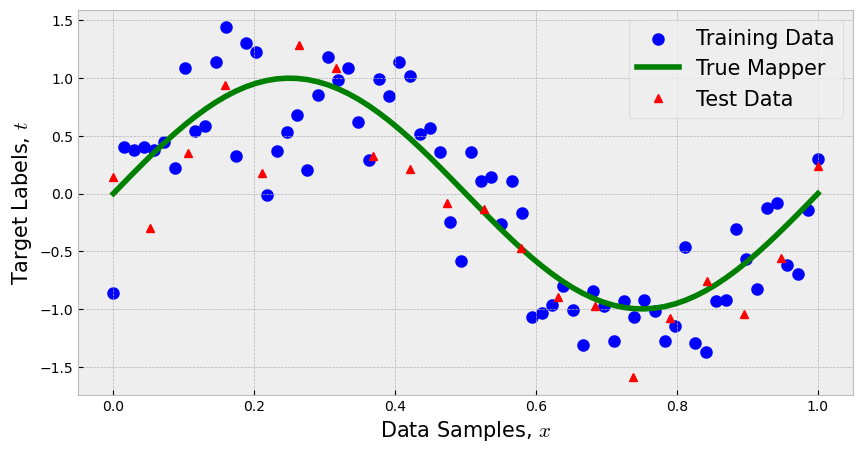

In [4]:
# Generate input samples and desired values
N_train = 70 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.5 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true fct
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

plt.figure(figsize=(10,5))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

In [5]:
def PolynomialRegression(x,t,M):
    '''Fit a polynomial of order M to the data input data x and desire values t'''
    
    # Compute feature matrix X with polynomial features
    X = np.array([x**i for i in range(M+1)]).T # this creates an N-by-(M+1) matrix
    
    # Compute the solution for the parameters w, using the MSE ojective function
    w = np.linalg.inv(X.T@X)@X.T@t 
    
    # Compute model prediction
    y = X@w
    
    return w, y

def PolynomialRegression_test(x_test, w):
    
    # Compute test feature matrix
    X_test = np.array([x_test**i for i in range(len(w))]).T # this is a N_test-by-(M+1) matrix
    
    # Prediction for test samples using the trained model
    y_test = X_test@w
    
    return y_test

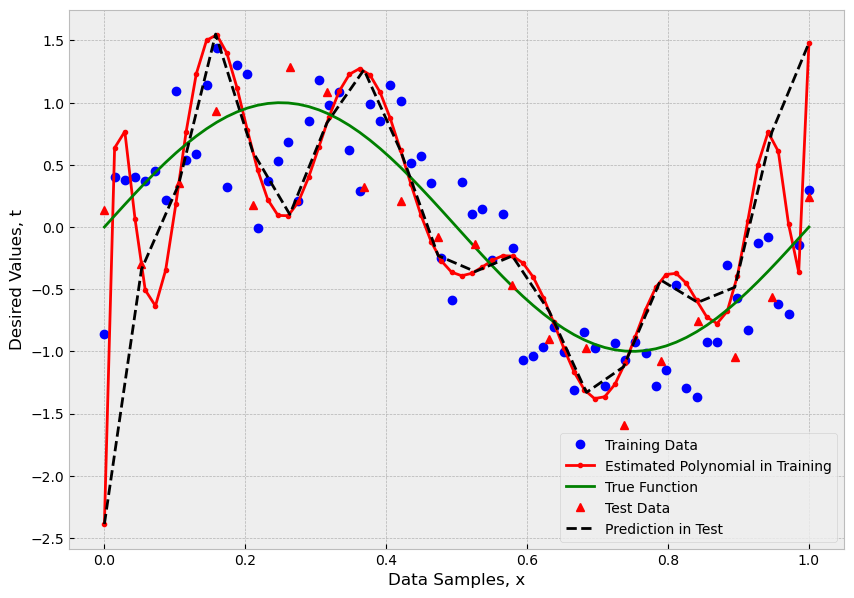

In [6]:
# Model Order
M = 15

# Find the parameters that fit the noisy sinusoidal
w, y_train = PolynomialRegression(x_train,t_train,M) 

# Predict output for test set
y_test = PolynomialRegression_test(x_test, w)

plt.figure(figsize=(10,7))
plt.plot(x_train, t_train, 'bo', label='Training Data')
plt.plot(x_train, y_train, '.-r', label = 'Estimated Polynomial in Training')
plt.plot(x_true, t_true, 'g', label = 'True Function')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.plot(x_test, y_test, '--k', label = 'Prediction in Test')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

In [ ]:
# Displaying the weight vectors

plt.figure(figsize=(10,4))
plt.stem(w)
plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in range(len(w))],rotation=0);

* What happens when the test points fall outside the range of what the model has *learned*?

In [ ]:
M = 4
w, y_train = PolynomialRegression(x_train,t_train,M) 

x_test2, t_test2 = NoisySinusoidalData(N_test, 0, 1.5, sigma_test)

plt.figure(figsize=(10,5))
plt.plot(x_train, t_train, 'bo', label = 'Training Data')
plt.plot(x_true, t_true, '-g', label = 'True Sinusoidal')
plt.plot(x_test2, t_test2, 'r^', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

In [ ]:
y_test2 = PolynomialRegression_test(x_test2, w)

plt.figure(figsize=(10,5))
plt.plot(x_train,t_train,'bo', label='Training Data')
plt.plot(x_train,y_train,'.-r', label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'-g', label = 'True Function')
plt.plot(x_test2,t_test2,'r^', label = 'Test Data')
plt.plot(x_test2,y_test2,'--k', label = 'Test Predictions')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

---

# Overfitting and Underfitting

<div class="alert alert-info">
    <b>Overfitting</b> 

In model fitting, a model is said to have **overfit** to the training data, if it is *not* able to *generalize* to new and unknown data. We can observe this effect as the training error is small but the error in the test data is very large.

In other words, overfitting means that the *true* underlying model of the data is not estimated/learned properly, instead the model returned a poor representation that **memorized** the training samples **and** any meaningless noise in the data.
</div>

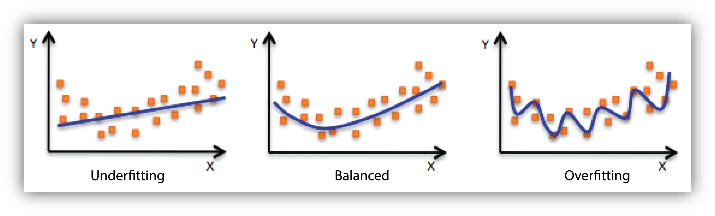

In [1]:
from IPython.display import Image
Image('figures/fits.png',width=700)

<div class="alert alert-info">
    <b>Underfitting</b> 

In model fitting, a model is said to have **underfit** if the error in both in training and test data sets are still decreasing. 

An underfitted model is not complex enough to model all the characteristics in the data.
</div>

As we saw before, as the polynomial model order increases, the weight values become very large! This is a good indication that we may be *memorizing* the training data.

* As $M$ increases, there are more parameters (more elements in the vector $\mathbf{w}$) to learn and, so, the model becomes more complex.

* The model order $M$ in polynomial regression regulates the model *complexity*. The large *M* is, the model complex the model is.
    * In a Polynomial regresssion it also controls the richness of the feature space.
* **Occam's Razor** states that the simplest model that works for our data is usually the most appropriate and sufficient. Model simplicity can mean different things, but we can consider model order. 

As a model that is too *complex*, it is more likely to *overfit*.
* This essentially means it "memorizes" the input training data and becomes incapable of predicting outside it,
* This includes memorizing all of the training data's noise!

---

# Strategies to Mitigate Overfitting

1. Add more data! - when possible

2. Occam's Razor - select a model with lower complexity

3. Regularization - constrains/regularizes the coefficients of the model

4. Cross-validation - technique for utilizing the training data to fine-tune hyperparameter values

---

# Regularization - Adding a Weight Penalty to the Objective Function

Suppose you have $N$ data points and you are trying to estimate $M$ parameters. In other words, you are solving a set of $N$ equations with $M$ variables. For the least squares objective function, we computed the solution for this linear system to be:

$$\mathbf{w} = \mathbf{X}^{\dagger}\mathbf{t} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{t}$$

**What happens when we have more unknowns than known variables, i.e., $M > N$? (This means the feature matrix $X$ will be a wide matrix.)** 

In other words, what happens when the data matrix, $\mathbf{X}^T\mathbf{X}$, is **not** full rank?

* Review *span* and *rank*: ["Inverse matrices, column space and null space", YouTube 3Blue1Brown video](https://www.youtube.com/watch?v=uQhTuRlWMxw&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=7)

In practice, it is quite often to obtain a **singular matrix** error. When this occurs, the matrix $\mathbf{X}^T\mathbf{X}$ is **not invertible**.

<div class="alert alert-info">
    <b>Regularization</b> 

Regularization constrains (or regularizes) the parameter coefficients such that they cannot take a large value. Regularization of the model parameters discourages learning a more complex, as to avoid the risk of overfitting.
</div>

### Ridge Regularizer

The Ridge regularizer, also known as the L2-Norm regularizer or weight decay, adds a term with the squared sum of the weights scaled by the hyperparameter $\lambda$. 

\begin{align*}
R^{(L2)}_{\mathbf{w}} &= \lambda \sum_{i=0}^M w_i^2 \\
&= \lambda \Vert\mathbf{w}\Vert_2^2
\end{align*}

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the objective function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

* The hyperparameter $\lambda$ controls how much you want to regularize the model. If $\lambda$ is 0 then the learning algorithm will just minimize the error term in the cost function. If $\lambda$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

### Lasso Regularizer

The Lasso regularizer, also known as the L1-norm regularizer, it adds a term with the L1-norm of the weight vector $\mathbf{w}$ scaled by the hyperparameter $\lambda$. $\lambda$ here has the same tradeoff responsibility.

\begin{align*}
R^{(L1)}_{\mathbf{w}} &= \lambda \sum_{i=0}^M |w_i| \\
&= \lambda \Vert\mathbf{w}\Vert_1
\end{align*}

* An important characteristic of the Lasso regularizer is that it tends to eliminate the weights of the least important features by setting them to zero. This is known as **sparsity**.

### Elastic Net Regularizer

Elastic Net is a middle ground between Ridge and Lasso. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio with the hyperparameter $\beta$.

\begin{align*}
R^{(L12)}_{\mathbf{w}} &= \beta\lambda \sum_{i=0}^M |w_i| + (1-\beta) \lambda \sum_{i=0}^M w_i^2 \\
&= \beta R^{(L1)}_{\mathbf{w}} + (1-\beta) R^{(L2)}_{\mathbf{w}}
\end{align*}

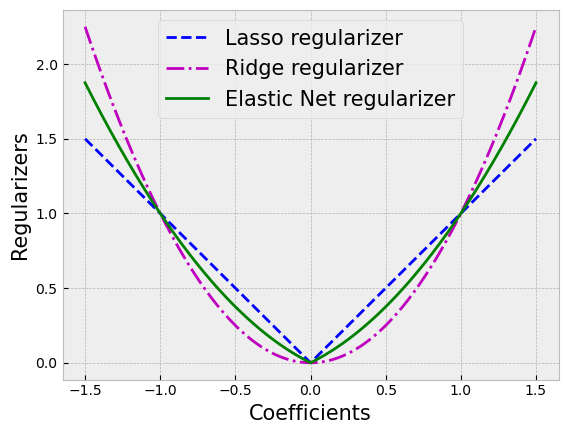

In [2]:
%matplotlib inline
def Regularizers(w,beta=0.5):
    L1 = np.abs(w)
    L2 = w**2
    Elastic = beta*np.abs(w) + (1-beta)*w**2
    return L1, L2, Elastic

x = np.linspace(-1.5,1.5,1000)
L1,L2,Elastic=Regularizers(x)

plt.plot(x,L1, 'b--', label = 'Lasso regularizer')
plt.plot(x,L2, 'm-.', label = 'Ridge regularizer')
plt.plot(x,Elastic, 'g-', label = 'Elastic Net regularizer')
plt.xlabel('Coefficients',size=15)
plt.ylabel('Regularizers',size=15); plt.legend(fontsize=15);

### Observations

* Ridge regularizer:
    * forces parameter values to be small but not equal to zero
    * is highly affected by outliers

* Lasso regularizer:
    * promotes sparsity, i.e. forces some parameter values to be exactly equal to zero
    * it is not as affected by outliers
    
* Elastic Net regularizer:
    * requires fine-tuning of an extra hyperparameter

### Examples

* Consider $\mathbf{w}=[0.5,0.5,1]$. We find that the rigde regularizer is $R^{(L2)}_{\mathbf{w}} = 0.5^2+0.5^2+1^2 = 1.5$, whereas the lasso regularizer gives us $R^{(L1)}_{\mathbf{w}}=0.5+0.5+1=2$. Thus, for this set of coefficients, the lasso regularizer will apply a stronger penalty (larger value).

* Consider $\mathbf{w}=[0,0,2]$. We find that the rigde regularizer is $R^{(L2)}_{\mathbf{w}} = 0^2+0^2+2^2 = 4$, whereas the lasso regularizer gives us $R^{(L1)}_{\mathbf{w}}=0+0+2=2$. Thus, for this set of coefficients, the ridge regularizer will apply a stronger penalty (larger value).

### Which one to choose?

Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

<div class="alert alert-info">
    <b>Ridge Regression</b> 

Let $\{(x_i,t_i)\}_{i=1}^N$ be the set of training data, where $x_i$ are the training samples and $t_i$ their associated target/desired value. Consider the linear regression model: $\mathbf{y} = \mathbf{X}\mathbf{w}$, where $\mathbf{X}$ is the feature matrix of size $N\times(M+1)$.

The Ridge Regression objective function penalizes the weights with the L2-norm:

\begin{align*}
J(\mathbf{w}) &= \Vert\mathbf{t}-\mathbf{X}\mathbf{w}\Vert_2^2 + \lambda \Vert\mathbf{w}\Vert_2^2
\end{align*}

where $\lambda$ is the **hyperparameter** that controls the trade off between minimizing the error and minimizing the regularizer.

Our goal is to find $\mathbf{w}$ that minimizes the objective function $J(\mathbf{w})$, that is:
    
\begin{align*}
\arg_{\mathbf{w}}\min J(\mathbf{w})
\end{align*}

</div>

Let's expand the equation for $J(\mathbf{w})$:

\begin{align*}
J(\mathbf{w}) &= \Vert\mathbf{t}-\mathbf{X}\mathbf{w}\Vert_2^2 + \lambda \Vert\mathbf{w}\Vert_2^2\\
&= (\mathbf{t}-\mathbf{X}\mathbf{w})^T(\mathbf{t}-\mathbf{X}\mathbf{w}) + \lambda\mathbf{w}^T\mathbf{w}\\
&= \mathbf{t}^T\mathbf{t} -\mathbf{t}^T\mathbf{X}\mathbf{w}-\mathbf{w}^T\mathbf{X}^T\mathbf{t}+\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} + \lambda\mathbf{w}^T\mathbf{w}
\end{align*}
    
Taking the derivative:

\begin{align*}
\frac{d J}{d \mathbf{w}} = -2\mathbf{t}^T\mathbf{X} + 2\mathbf{w}^T\mathbf{X}^T\mathbf{X} + \lambda 2\mathbf{w}^T\mathbf{I}
\end{align*}

Setting it to zero, applyting transpose on both sides, and solving for $\mathbf{w}$:

\begin{align*}
-\mathbf{X}^T\mathbf{t} + \mathbf{X}^T\mathbf{X}\mathbf{w} + \lambda \mathbf{I}\mathbf{w} &= 0 \\
(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})\mathbf{w} &= \mathbf{X}^T\mathbf{t}\\
\mathbf{w} &= (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T\mathbf{t}
\end{align*}

The optimal solution is in closed-form analytical solution. This is because we are dealing with a linear model and a convex objective function:

$$\mathbf{w} = \left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

where $\mathbf{I}$ is an identity matrix of size $(M+1)\times (M+1)$. As you can see, we first **diagonally-load** the square matrix $\mathbf{X}^T\mathbf{X}$ before inverting it.

### Observations

* In practice, the square matrix $\mathbf{X}^T\mathbf{X}$ may be **singular**. This will happen when:
    1. There are more parameters ($M$) than samples ($N$).
    2. Some of the features are linearly dependent.
    
* A singular matrix:
    * is not full rank
    * has at least one eigenvalue equal to 0
    * its determinant is 0
    * one or more columns (or rows) are linearly dependent

* One solution to matrix singularity is to diagonally load it, before inverting. Diagonally loading a singular matrix, will force it to become full rank.

* If $\lambda \rightarrow 0$, then the penalty will be disregarded in the solution for the parameters. This applies the least *distortion* to $\mathbf{X}^T\mathbf{X}$.

* If $\lambda \rightarrow \infty$, then the penalty term will be very large, therefore the learning algorithm will *try* to minimize it. This applies the most *distortion* to $\mathbf{X}^T\mathbf{X}$.

**In code, how would you change the function ```PolynomialRegression``` created above to include the regularization term?**

In [7]:
def PolynomialRegression_reg(x,t,M,lam):
    
    # Compute feature matrix X with polynomial features
    X = np.array([x**i for i in range(M+1)]).T
    
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X + lam*np.eye(M+1))@X.T@t
    
    # Compute model prediction
    y = X@w
    
    return w, y

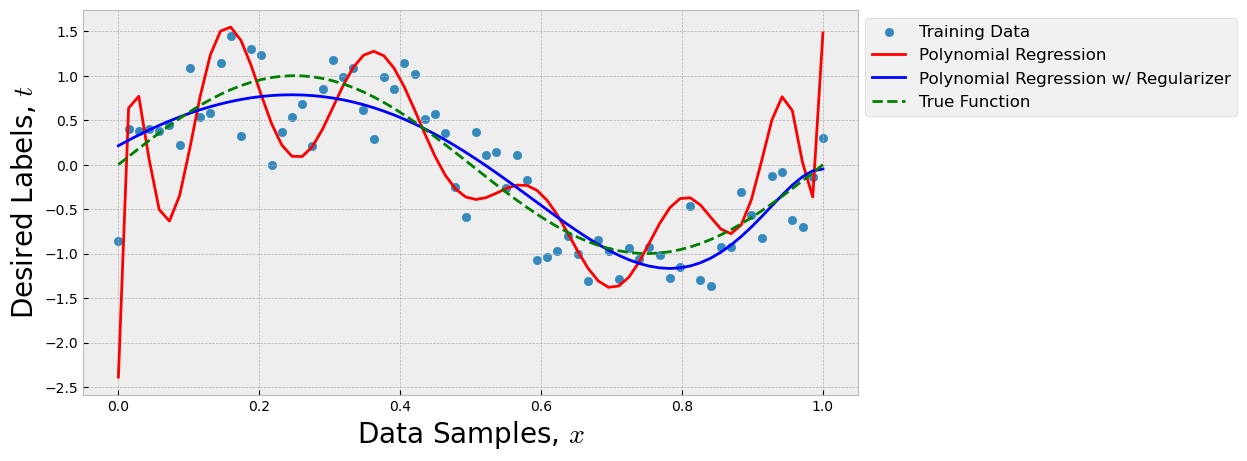

In [13]:
M = 15
lam = 0.01

w, y = PolynomialRegression(x_train,t_train,M) 
w_reg, y_reg = PolynomialRegression_reg(x_train,t_train,M,lam) 

fig=plt.figure(figsize=(10,5))
plt.scatter(x_train,t_train, label='Training Data')
plt.plot(x_train,y,'r', label = 'Polynomial Regression')
plt.plot(x_train,y_reg, 'b',label = 'Polynomial Regression w/ Regularizer')
plt.plot(x_true,t_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

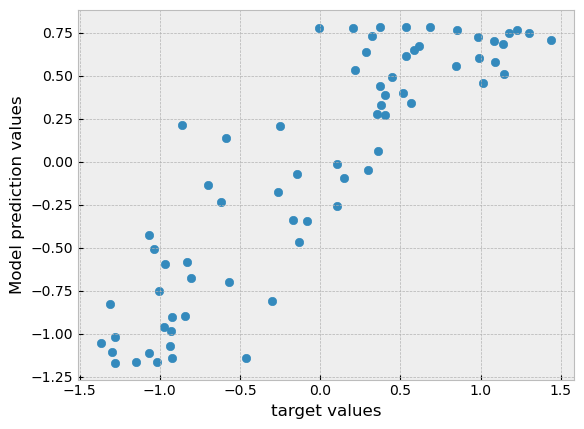

In [17]:
plt.scatter(t_train, y_reg)
plt.ylabel('Model prediction values')
plt.xlabel('target values');

# Performance Measures for Regression Tasks

In order to determine if the model is able to **generalize** to a **validation set**, we need to determine a **performance measure**.

Which measures would you use to compare model performances?

1. Error measures are always a good start for **regression** tasks. Some examples include:

    * Mean Squared Error (MSE) - best when the data does not have outliers. The MSE will penalize outliers heavily.

    * Mean Absolute Error (MAE) - best when you suspect data has outliers.
    
    * Normalized mean squared error (NMSE).
    
    * Normalized mean absolute error (NMAE).

2. Coefficient of Determination $r^2$
    * Advantage: it is bounded between $[0,1]$, where values closer to 1 indicate a better prediction.
    
3. Quantile-Quantile plot (or Q-Q plot)

    * Qualitative measurement of the model predictions vs the target values.
    * The Q-Q plot is used to answer the following questions:
        * Do two data sets come from populations with a common distribution?
        * Do two data sets have common location and scale?
        * Do two data sets have similar distributional shapes?
        * Do two data sets have similar tail behavior?

## Other Performance Measures

Performance of an algorithm can be determined using a variety of statistical goodness-of-fit measures. 

* For regression tasks this includes error-based measurements, hypothesis tests, Q-Q plots.
* For classification tasks this includes error rate, accuracy, ROC curves, performance-recall curves.

But it can also be in terms of:
1. Risk,
2. Training time,
3. Training storage/memory,
4. Testing time,
5. Testing storage/memory,
6. Interpretability, namely, whether the method allows knowledge extraction which can be checked and validated by experts, and
7. computational complexity.

---